# Module 5 Exercise 1 - Create growth charts

## Overview
In this exercise you will create growth charts on a set of patients that you will query from a FHIR resource.  This exercise will produce longitudinal height and weight charts such as you might find embedded in an Electronic Health Record.

## Data Format

You will pull data from the following test server: `https://r3.smarthealthit.org/`

The data format you will use is the HL7 FHIR v3, documentation for which can be found here: http://hl7.org/fhir/STU3/

This lab will use the [Patient](https://docs.smarthealthit.org/client-py/classfhirclient_1_1models_1_1patient_1_1_patient.html) and [Observation](https://docs.smarthealthit.org/client-py/classfhirclient_1_1models_1_1observation_1_1_observation.html) resources from the [fhirclient](https://docs.smarthealthit.org/client-py/) python module.

For the Observations, the following LOINC codes will be used to select height and weight:

* Weight
    * http://loinc.org|29463-7
    * http://loinc.org|3141-9
* Height
    * http://loinc.org|8302-2
    * http://loinc.org|8306-3

You will only select patients that are 4 years old (but less than 5) as of 2020-01-01.

## Required Output
You are required to create the necessary plots in the **final** output cell of this notebook.  Each patient should have their own chart plotting height and weight over time using two series (one for height and one for weight).  Each series should be plotted as a line.  The title of each chart should be a sequential number, starting at 1 and increasing by 1 for each subsequent patient.

In addition to the plots, you will create an output file containing the data that you selected through the FHIR interface.

This file should be placed in the `output` folder located at the root directory for this course, as specified below.  Columns must be in the specified order, with a header row.  Double quotes should enclose all field values (including the header column names), and commas separating all columns.  All whitespace should be trimmed from the beginning and end of all field values, and no spaces should exist between the double quote field enclosures and comma field separators.  This output format is achievable with the `to_csv` method of a pandas dataframe object.  You should use *relative* pathing to access the `output` folder when writing, as absolute paths do not seem to always work.  The filename should be all lowercase.

### File location and field names
    1. /output/ex-5-1.csv
            <patient_id>,<date>,<code>,<value>

        
The file should be **sorted** in **ascending** order by the first two columns of data. **Round** the value to **two** decimal places (do not pad the decimals to two places with zeroes).

#### Example file format (not real data)
/output/ex-5-1.csv
```
"patient_id","date","code","value"
"08f23d19-c0c1-481d-8507-ddb5b23cf628","2012-09-06 19:30:37-04:00","29463-7","5.27"
"08f23d19-c0c1-481d-8507-ddb5b23cf628","2012-09-06 19:30:37-04:00","8302-2","53.2"
"08f23d19-c0c1-481d-8507-ddb5b23cf628","2012-10-16 10:20:03-04:00","29463-7","6.04"
"08f23d19-c0c1-481d-8507-ddb5b23cf628","2012-10-16 10:20:03-04:00","8302-2","55.97"
.
.
.
```

        
## Grading
You will be graded on the correctness of your output file and plots, as well as the completeness of your code. Your jupyter notebook must be able to be run from a restarted kernel and run to completion, producing the proper output, using no more than the data provided or produced from these exercises. In other words, you cannot do work outside of the jupyter notebook, save it to a file, and use that information in this project.

### Rubric

There are 597 records plus one header row contained in the output.  The file is worth 25 points.  For each mismatched line to the reference file, 0.02 points will be deducted, for a maximum of 11.96 points (approximately half the point value of the file). Failure to write the output in the proper order and format will likely result in a complete mismatch to the reference file, so be sure to double check your output to the example format above, and use the order as specified!  Not submitting a file with the correct name in the correct folder will result in a loss of 25 points.

In addition to the file, you must show inline plots of the data using matplotlib or seaborn. The plots are worth 25 points.  If you do not have all 25 plots, you will lose 1 point for each missing plot.  If a plot is incorrect, you will lose 0.5 points.

Failure to submit a functioning notebook meeting the specified requirements will result in a grade of zero.

In [1]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install fhirclient
from fhirclient import client

fhir_server = 'https://r3.smarthealthit.org/'

## Get list of patients that are 4 years old

Get a list of patients that are 4 years old as of 2020-01-01.  Store the list for later use.
(Hint: Calculate the birthdates that would leave a patient at 4 years old but less than 5 on 2020-01-01, and specify two conditions for birthdate when searching)

In [2]:
# your code here

import fhirclient.models.patient as p

settings = {
    'app_id': 'my_web_app',
    'api_base': 'https://r3.smarthealthit.org/'
}
smart = client.FHIRClient(settings=settings)

In [50]:
import fhirclient.models.encounter as e

search = p.Patient.where(struct={'birthdate': {'$lte': '2016-01-01', '$gt': '2015-01-01'}})
patients = search.perform_resources(smart.server)

patient_list = []

for patient in patients:
    patient_list.append(patient.id)
    
# for patient in patients:
#     dict = {
#         "id": patient.id,
#         "birthdate": patient.birthDate.date
#     }
#     patient_list.append(dict)
    

In [51]:
patient_list

['11976f90-bb42-450a-8b58-92a4cace1d27',
 '497f3bba-115c-4aad-b02f-7c9fb8d8b1ec',
 'c715ec8e-6038-45ca-acdc-3f08e6e9c523',
 '8596a24c-ace3-4aae-aa38-5050fb138667',
 '08f23d19-c0c1-481d-8507-ddb5b23cf628',
 '0ac367f4-8565-4d85-b4e6-93b541019072',
 'f8a7cd30-0e6c-4434-a6a8-3d71abf47e39',
 '0886c82a-668b-44a2-b1c1-d66649dc1596',
 'b54ab87c-82e5-40be-bd1e-7ca0978399cd',
 '1cb3a22a-536c-41d3-b9c8-4284f185a1b5',
 'f0da5bc2-0617-4a1d-980b-638b4a392a8e',
 '1fcb00f4-621f-47e3-b370-649a4836c00b',
 'bdca0065-4782-4190-b23a-9c5a976cd877',
 'dbc701ef-fcd0-4c88-a078-08ed2eb1989c',
 '0d6589cf-c787-4206-bf9e-e16205a16b9d',
 'a6012724-99f9-4273-856f-2270b86cac3f',
 'c6a2b745-5bf9-4da0-bdef-1c887e350258',
 '9f2714de-ea92-4954-b4b9-fdf17516ac6a',
 'da943272-fa1b-4b8c-b035-5eb5ab796d3a',
 '83c3ef95-d6b1-4e5e-8959-39a17d3fdadb',
 '11e350c1-3da5-45d8-99a3-98b54daf8db5',
 'smart-7777701',
 '3f25fbaa-886a-4858-9bfd-d5fc637cac62',
 'd90b026d-86e3-49ce-98a7-0da3410473a3',
 '13dc4920-0a15-419c-8faa-8d3d3aba3908'

## Checkpoint

You should have selected 25 patients.

## Get a list of observations for body weight and height for each patient
Using the codes from the exercise description, retrieve all of the weights and heights for each patient retrieved previously.  Store the values for later use.

In [97]:
# your code here

import fhirclient.models.observation as o

weight1_list = []
weight2_list = []
height1_list = []
height2_list = []

for patient in patient_list:
    search = o.Observation.where(struct={'patient': patient, 'code': '29463-7'})
    obsrvtns = search.perform_resources(smart.server)
    for obsrvtn in obsrvtns:
        weight1_dict = {
            "id": patient,
            "date": obsrvtn.effectiveDateTime.isostring,
            "code": obsrvtn.code.coding[0].code,
            "value": obsrvtn.valueQuantity.value            
        }
        weight1_list.append(weight1_dict)
        
for patient in patient_list:
    search = o.Observation.where(struct={'patient': patient, 'code': '3141-9'})
    obsrvtns = search.perform_resources(smart.server)
    for obsrvtn in obsrvtns:
        weight2_dict = {
            "id": patient,
            "date": obsrvtn.effectiveDateTime.isostring,
            "code": obsrvtn.code.coding[0].code,
            "value": obsrvtn.valueQuantity.value
        }
        weight2_list.append(weight2_dict)
        
for patient in patient_list:
    search = o.Observation.where(struct={'patient': patient, 'code': '8302-2'})
    obsrvtns = search.perform_resources(smart.server)
    for obsrvtn in obsrvtns:
        height1_dict = {
            "id": patient,
            "date": obsrvtn.effectiveDateTime.isostring,
            "code": obsrvtn.code.coding[0].code,
            "value": obsrvtn.valueQuantity.value
        }
        height1_list.append(height1_dict)
        
for patient in patient_list:
    search = o.Observation.where(struct={'patient': patient, 'code': '8306-3'})
    obsrvtns = search.perform_resources(smart.server)
    for obsrvtn in obsrvtns:
        height2_dict = {
            "id": patient,
            "date": obsrvtn.effectiveDateTime.isostring,
            "code": obsrvtn.code.coding[0].code,
            "value": obsrvtn.valueQuantity.value
        }
        height2_list.append(height2_dict)

        # apparently this one returns no values

In [108]:
weight1_df = pd.DataFrame(weight1_list)
weight2_df = pd.DataFrame(weight2_list)
height_df = pd.DataFrame(height1_list)

frames = [weight1_df, weight2_df, height_df]

df = pd.concat(frames)
df.rename(columns={'id': 'patient_id'}, inplace=True)
df

,patient_id,date,code,value
0,11976f90-bb42-450a-8b58-92a4cace1d27,2016-01-14T16:13:13Z,29463-7,4.159498
1,11976f90-bb42-450a-8b58-92a4cace1d27,2016-02-24T09:10:27Z,29463-7,4.807145
2,11976f90-bb42-450a-8b58-92a4cace1d27,2016-10-09T14:30:05Z,29463-7,8.101221
3,11976f90-bb42-450a-8b58-92a4cace1d27,2017-01-08T21:37:15Z,29463-7,9.295091
4,11976f90-bb42-450a-8b58-92a4cace1d27,2017-04-25T00:49:25Z,29463-7,9.986306
...,...,...,...,...
291,13dc4920-0a15-419c-8faa-8d3d3aba3908,2016-08-15T16:23:37Z,8302-2,70.868723
292,13dc4920-0a15-419c-8faa-8d3d3aba3908,2015-07-20T02:51:49Z,8302-2,50.956997
293,13dc4920-0a15-419c-8faa-8d3d3aba3908,2015-08-27T20:31:07Z,8302-2,53.629244
294,13dc4920-0a15-419c-8faa-8d3d3aba3908,2017-10-18T14:58:55Z,8302-2,81.877461


In [109]:
df = df.sort_values(by=['patient_id', 'date']).reset_index(drop=True)

df

,patient_id,date,code,value
0,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11T10:26:16Z,29463-7,4.836804
1,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11T10:26:16Z,8302-2,61.625926
2,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16T06:13:34Z,29463-7,5.625771
3,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16T06:13:34Z,8302-2,64.692421
4,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-10-26T05:43:46Z,29463-7,6.987340
...,...,...,...,...
592,smart-7777701,2016-03-01,8302-2,70.400000
593,smart-7777701,2016-04-16,3141-9,8.000000
594,smart-7777701,2016-04-16,8302-2,71.200000
595,smart-7777701,2016-07-22,3141-9,8.600000


In [117]:
df['value'] = pd.to_numeric(df['value'])

df['value'] = df['value'].round(2)

df

,patient_id,date,code,value
0,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11T10:26:16Z,29463-7,4.84
1,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11T10:26:16Z,8302-2,61.63
2,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16T06:13:34Z,29463-7,5.63
3,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16T06:13:34Z,8302-2,64.69
4,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-10-26T05:43:46Z,29463-7,6.99
...,...,...,...,...
592,smart-7777701,2016-03-01,8302-2,70.40
593,smart-7777701,2016-04-16,3141-9,8.00
594,smart-7777701,2016-04-16,8302-2,71.20
595,smart-7777701,2016-07-22,3141-9,8.60


In [126]:
import datetime

df['date'] = pd.to_datetime(df['date'], utc=True)

df

,patient_id,date,code,value
0,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11 10:26:16+00:00,29463-7,4.84
1,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-07-11 10:26:16+00:00,8302-2,61.63
2,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16 06:13:34+00:00,29463-7,5.63
3,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-08-16 06:13:34+00:00,8302-2,64.69
4,0886c82a-668b-44a2-b1c1-d66649dc1596,2015-10-26 05:43:46+00:00,29463-7,6.99
...,...,...,...,...
592,smart-7777701,2016-03-01 00:00:00+00:00,8302-2,70.40
593,smart-7777701,2016-04-16 00:00:00+00:00,3141-9,8.00
594,smart-7777701,2016-04-16 00:00:00+00:00,8302-2,71.20
595,smart-7777701,2016-07-22 00:00:00+00:00,3141-9,8.60


## Checkpoint

You should have 597 observations across all patients.

## Create the output file
See the exercise instructions for specifics on the output file.  Follow the format exactly!  Open your output file in a text editor and double check that it meets the format specifications.  Filenames are case sensitive, so use all lowercase as specified.

In [135]:
# your code here

import csv

df.to_csv(r'/dsa/home/dcphw2/jupyter/sp22dsa8140_dcphw2/output/ex-5-1.csv', quoting = csv.QUOTE_ALL, quotechar='"', index=False)

## Plot charts

For each patient, create a single line chart containing the body weights and heights plotted in order of increasing observation date.  There should be a separate line in the chart for body weight and height.  Plot the values on the y axis and the date on the x axis.  Title each plot sequentially starting from 1 and ending at 25.

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

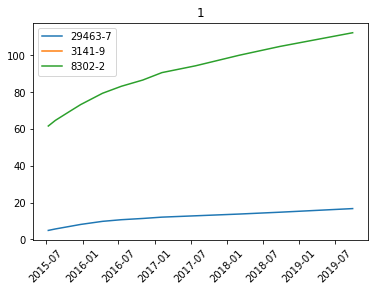

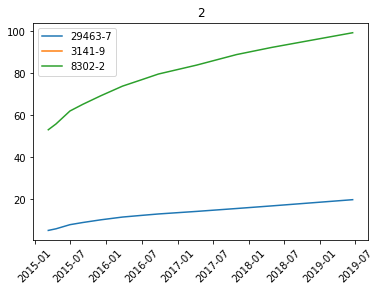

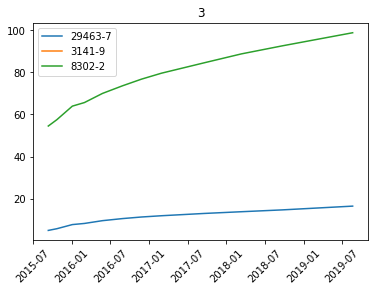

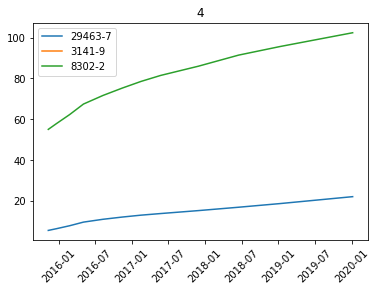

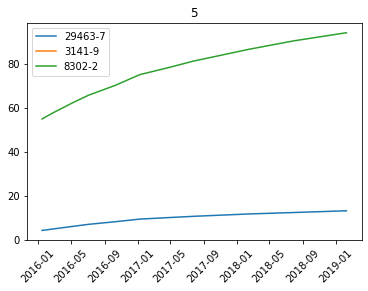

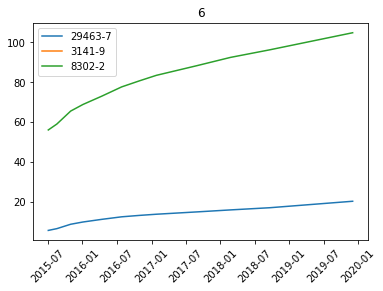

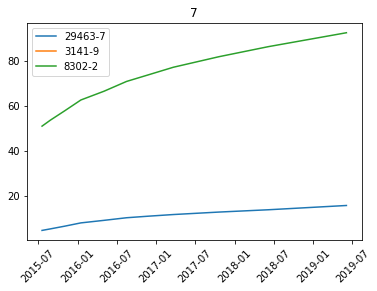

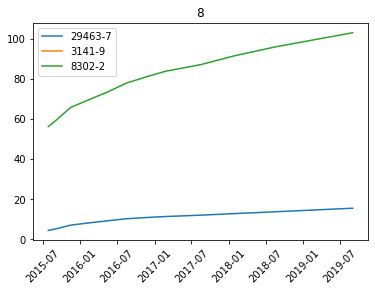

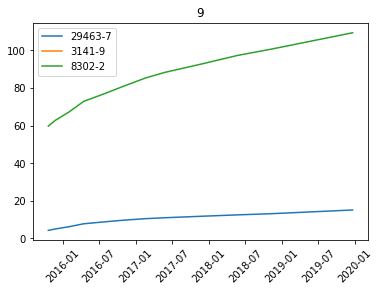

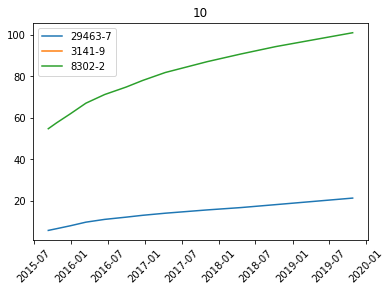

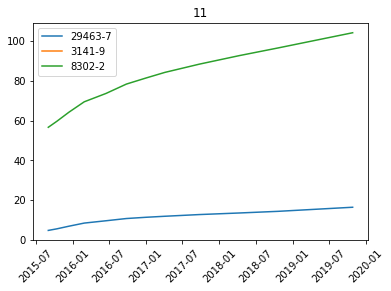

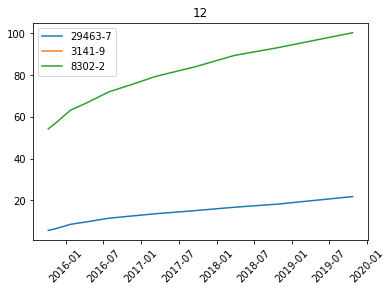

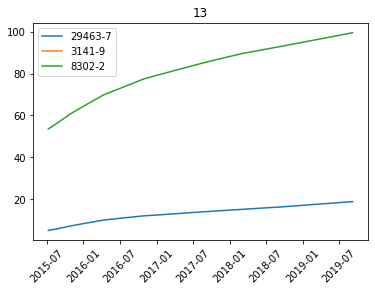

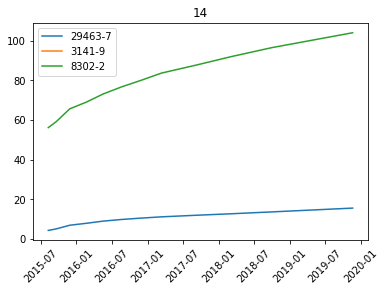

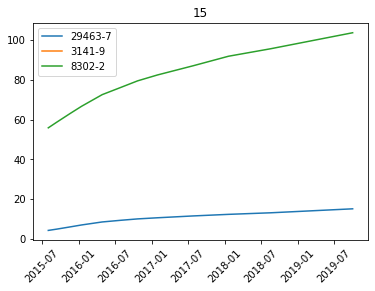

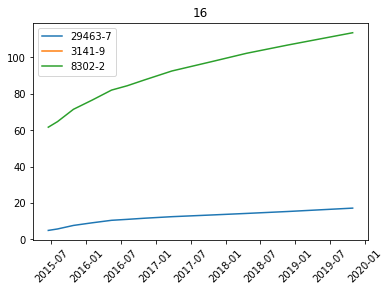

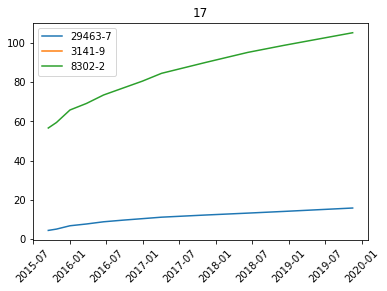

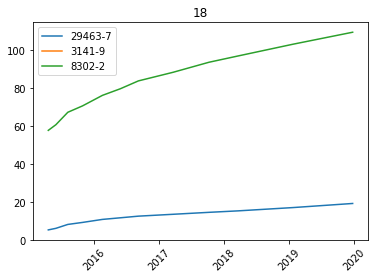

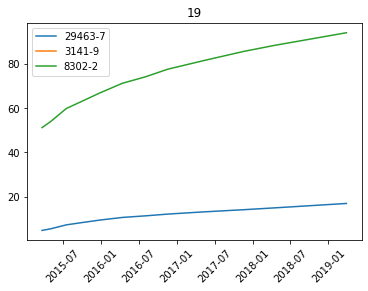

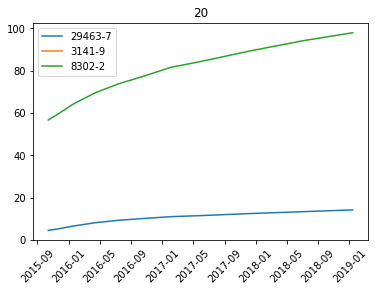

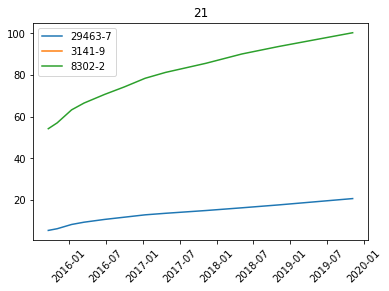

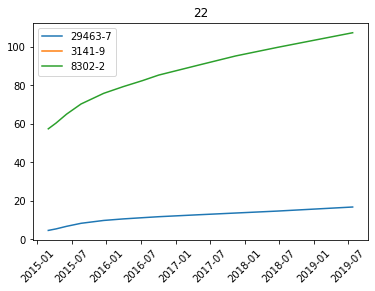

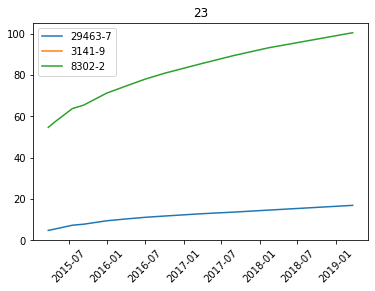

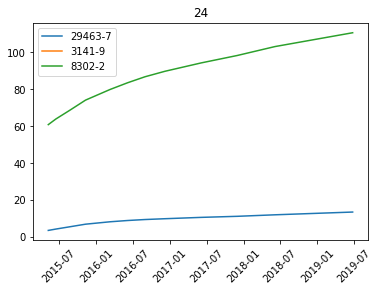

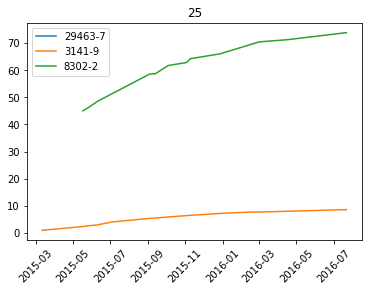

In [163]:
# your code here

patients = df['patient_id'].unique()

i=1
for patient in patients:
    plt.plot(df[(df['patient_id'] == patient) & (df['code'] == '29463-7')].date, df[(df['patient_id'] == patient) & (df['code'] == '29463-7')].value, label='29463-7')
    plt.plot(df[(df['patient_id'] == patient) & (df['code'] == '3141-9')].date, df[(df['patient_id'] == patient) & (df['code'] == '3141-9')].value, label='3141-9')
    plt.plot(df[(df['patient_id'] == patient) & (df['code'] == '8302-2')].date, df[(df['patient_id'] == patient) & (df['code'] == '8302-2')].value, label='8302-2')
    
    plt.title(i)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    i=i+1
    
